In [27]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [28]:
%tensorflow_version 1.x # 이렇게 적으면, 1.* 버전을 사용할 수 있음.
from keras.models import *
from keras.callbacks import *
import keras.backend as K
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Activation,Flatten
import cv2
import numpy as np
import matplotlib.pylab as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x # 이렇게 적으면, 1.* 버전을 사용할 수 있음.`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [29]:
def get_output_layer(model, layer_name):
    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    layer = layer_dict[layer_name]
    return layer

In [30]:
num_classes = 2
model = MobileNetV2(weights='imagenet', include_top=False, pooling = 'avg')
x = Dense(num_classes, activation='softmax', name='predictions')(model.output)

custom_mobilenetv2_model = Model(model.input, x)

custom_mobilenetv2_model.load_weights('/content/drive/My Drive/mobilenetv2_orthodontics_cam.h5')

/tensorflow-1.15.2/python3.6/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [32]:
class_weights = custom_mobilenetv2_model.layers[-1].get_weights()[0]
final_conv_layer = get_output_layer(custom_mobilenetv2_model,'Conv_1')
get_output = K.function([custom_mobilenetv2_model.layers[0].input], [final_conv_layer.output, custom_mobilenetv2_model.layers[-1].output])

In [33]:
Y_label = ['Orthodontics','Normal']

predictions [[2.3936107e-05 9.9997604e-01]]


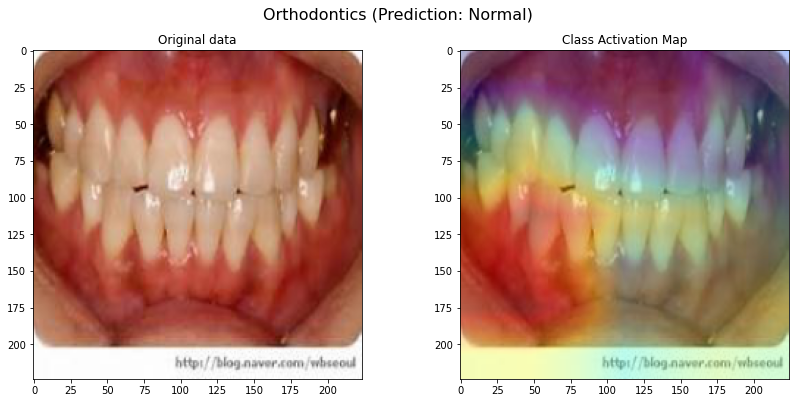

In [34]:
width, height = 224, 224
img_path='/content/drive/My Drive/transfer_learning_data/11.jpeg'
original_img = plt.imread(img_path)
original_img = cv2.resize(original_img, (height, width))
img = np.array([original_img])

[conv_outputs, predictions] = get_output([img])

#Create the class activation map.
cam = np.zeros(dtype = np.float32, shape = conv_outputs.shape[1:3])
for i, w in enumerate(class_weights[:, 1]):
	cam += w * conv_outputs[0,:, :, i]
print("predictions", predictions)
cam /= np.max(cam)
cam[cam<0.2] = 0
cam = cv2.resize(cam, (height, width))

if np.argmax(predictions) == 1:
	tit_sup = 'Orthodontics (Prediction: %s)' % Y_label[np.argmax(predictions)]
	tit = 'Orthodontics'
else:
	tit_sup = 'Normal (Prediction: %s)' % Y_label[np.argmax(predictions)]
	tit = 'Normal'

fig=plt.figure(2,figsize=(12,6))
sp1=plt.subplot(1,2,1)
sp1.imshow(original_img.astype(int))
sp1.set_title("Original data")

# plt.figure(2,figsize=(7,5))
sp2 =plt.subplot(1,2,2)
sp2.imshow(original_img.astype(int))
sp2.imshow(cam, alpha=0.3, cmap='jet')
sp2.set_title("Class Activation Map")

sup_title=fig.suptitle(tit_sup, fontsize=16, y=0.93)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.subplots_adjust(top=0.83)

predictions [[2.9579126e-06 9.9999702e-01]]


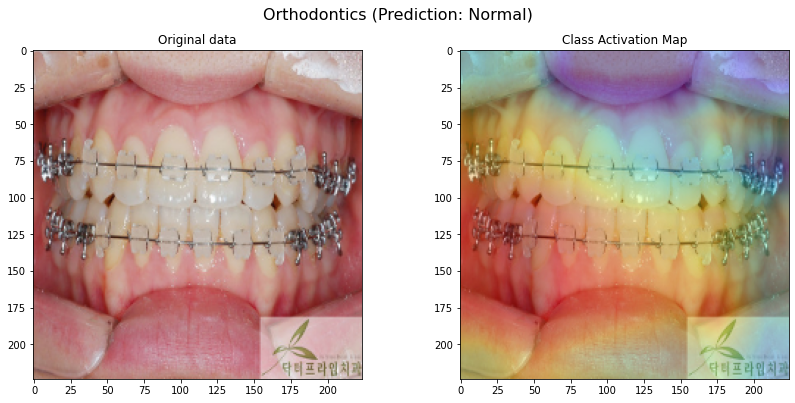

In [35]:
width, height = 224, 224
img_path='/content/drive/My Drive/transfer_learning_data/60.jpeg'
original_img = plt.imread(img_path)
original_img = cv2.resize(original_img, (height, width))
img = np.array([original_img])

[conv_outputs, predictions] = get_output([img])

#Create the class activation map.
cam = np.zeros(dtype = np.float32, shape = conv_outputs.shape[1:3])
for i, w in enumerate(class_weights[:, 1]):
	cam += w * conv_outputs[0,:, :, i]
print("predictions", predictions)
cam /= np.max(cam)
cam[cam<0.2] = 0
cam = cv2.resize(cam, (height, width))

if np.argmax(predictions) == 1:
	tit_sup = 'Orthodontics (Prediction: %s)' % Y_label[np.argmax(predictions)]
	tit = 'Orthodontics'
else:
	tit_sup = 'Normal (Prediction: %s)' % Y_label[np.argmax(predictions)]
	tit = 'Normal'

fig=plt.figure(2,figsize=(12,6))
sp1=plt.subplot(1,2,1)
sp1.imshow(original_img.astype(int))
sp1.set_title("Original data")

# plt.figure(2,figsize=(7,5))
sp2 =plt.subplot(1,2,2)
sp2.imshow(original_img.astype(int))
sp2.imshow(cam, alpha=0.3, cmap='jet')
sp2.set_title("Class Activation Map")

sup_title=fig.suptitle(tit_sup, fontsize=16, y=0.93)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.subplots_adjust(top=0.83)